From sklearn.datasets load digits dataset and do following

    Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
    Plot confusion matrix
    Plot classification report


In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
digits=load_digits()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [21]:
input = pd.DataFrame(digits.data,columns=digits.feature_names)
input.info()
input.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [7]:
target=digits.target

In [23]:
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_predict=knn.predict(X_test)
knn.score(X_test,y_test)

0.9833333333333333

In [29]:
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_predict,y_test)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 37]])

<Axes: >

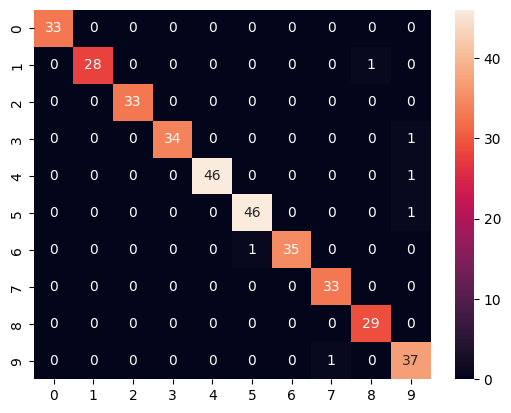

In [30]:
import seaborn as sns
sns.heatmap(cm,annot=True)

0.9888888888888889


<Axes: >

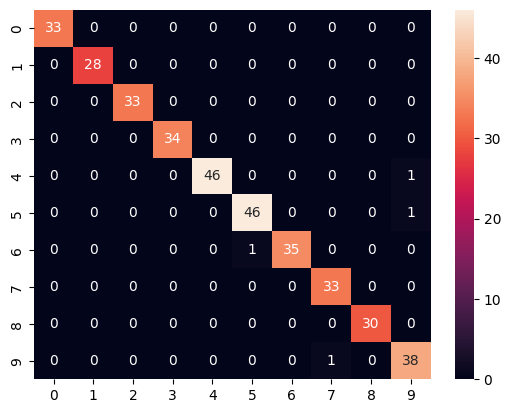

In [32]:
knn=KNeighborsClassifier(n_neighbors=6)
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print(knn.score(X_test,y_test))
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_predict,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

0.9888888888888889


<Axes: >

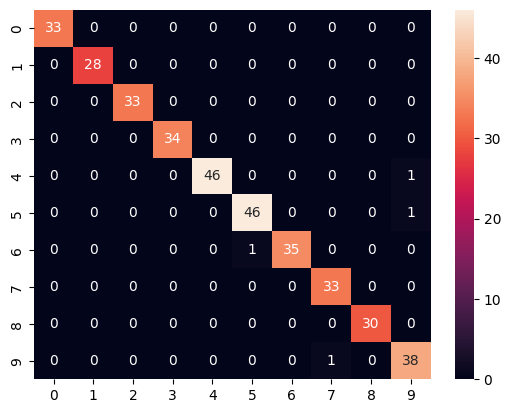

In [40]:
knn=KNeighborsClassifier(n_neighbors=7)
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print(knn.score(X_test,y_test))
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_predict,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      0.98      0.99        47
           5       0.98      0.98      0.98        47
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        33
           8       1.00      1.00      1.00        30
           9       0.95      0.97      0.96        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [69]:
from sklearn.decomposition import PCA
pca=PCA(0.40)

In [70]:
X_pca=pca.fit_transform(input)
X_pca.shape

(1797, 3)

0.7888888888888889


<Axes: >

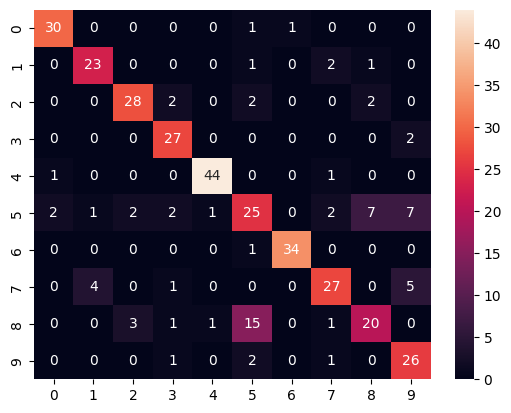

In [71]:
knn=KNeighborsClassifier(n_neighbors=7)
X_train,X_test,y_train,y_test=train_test_split(X_pca,target,test_size=0.2,random_state=42)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print(knn.score(X_test,y_test))
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_predict,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)